In [96]:
import pandas as pd
import seaborn as sns

### Importing Dataset

In [97]:
df = pd.read_csv("diabetes.csv")

In [98]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [99]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## EDA

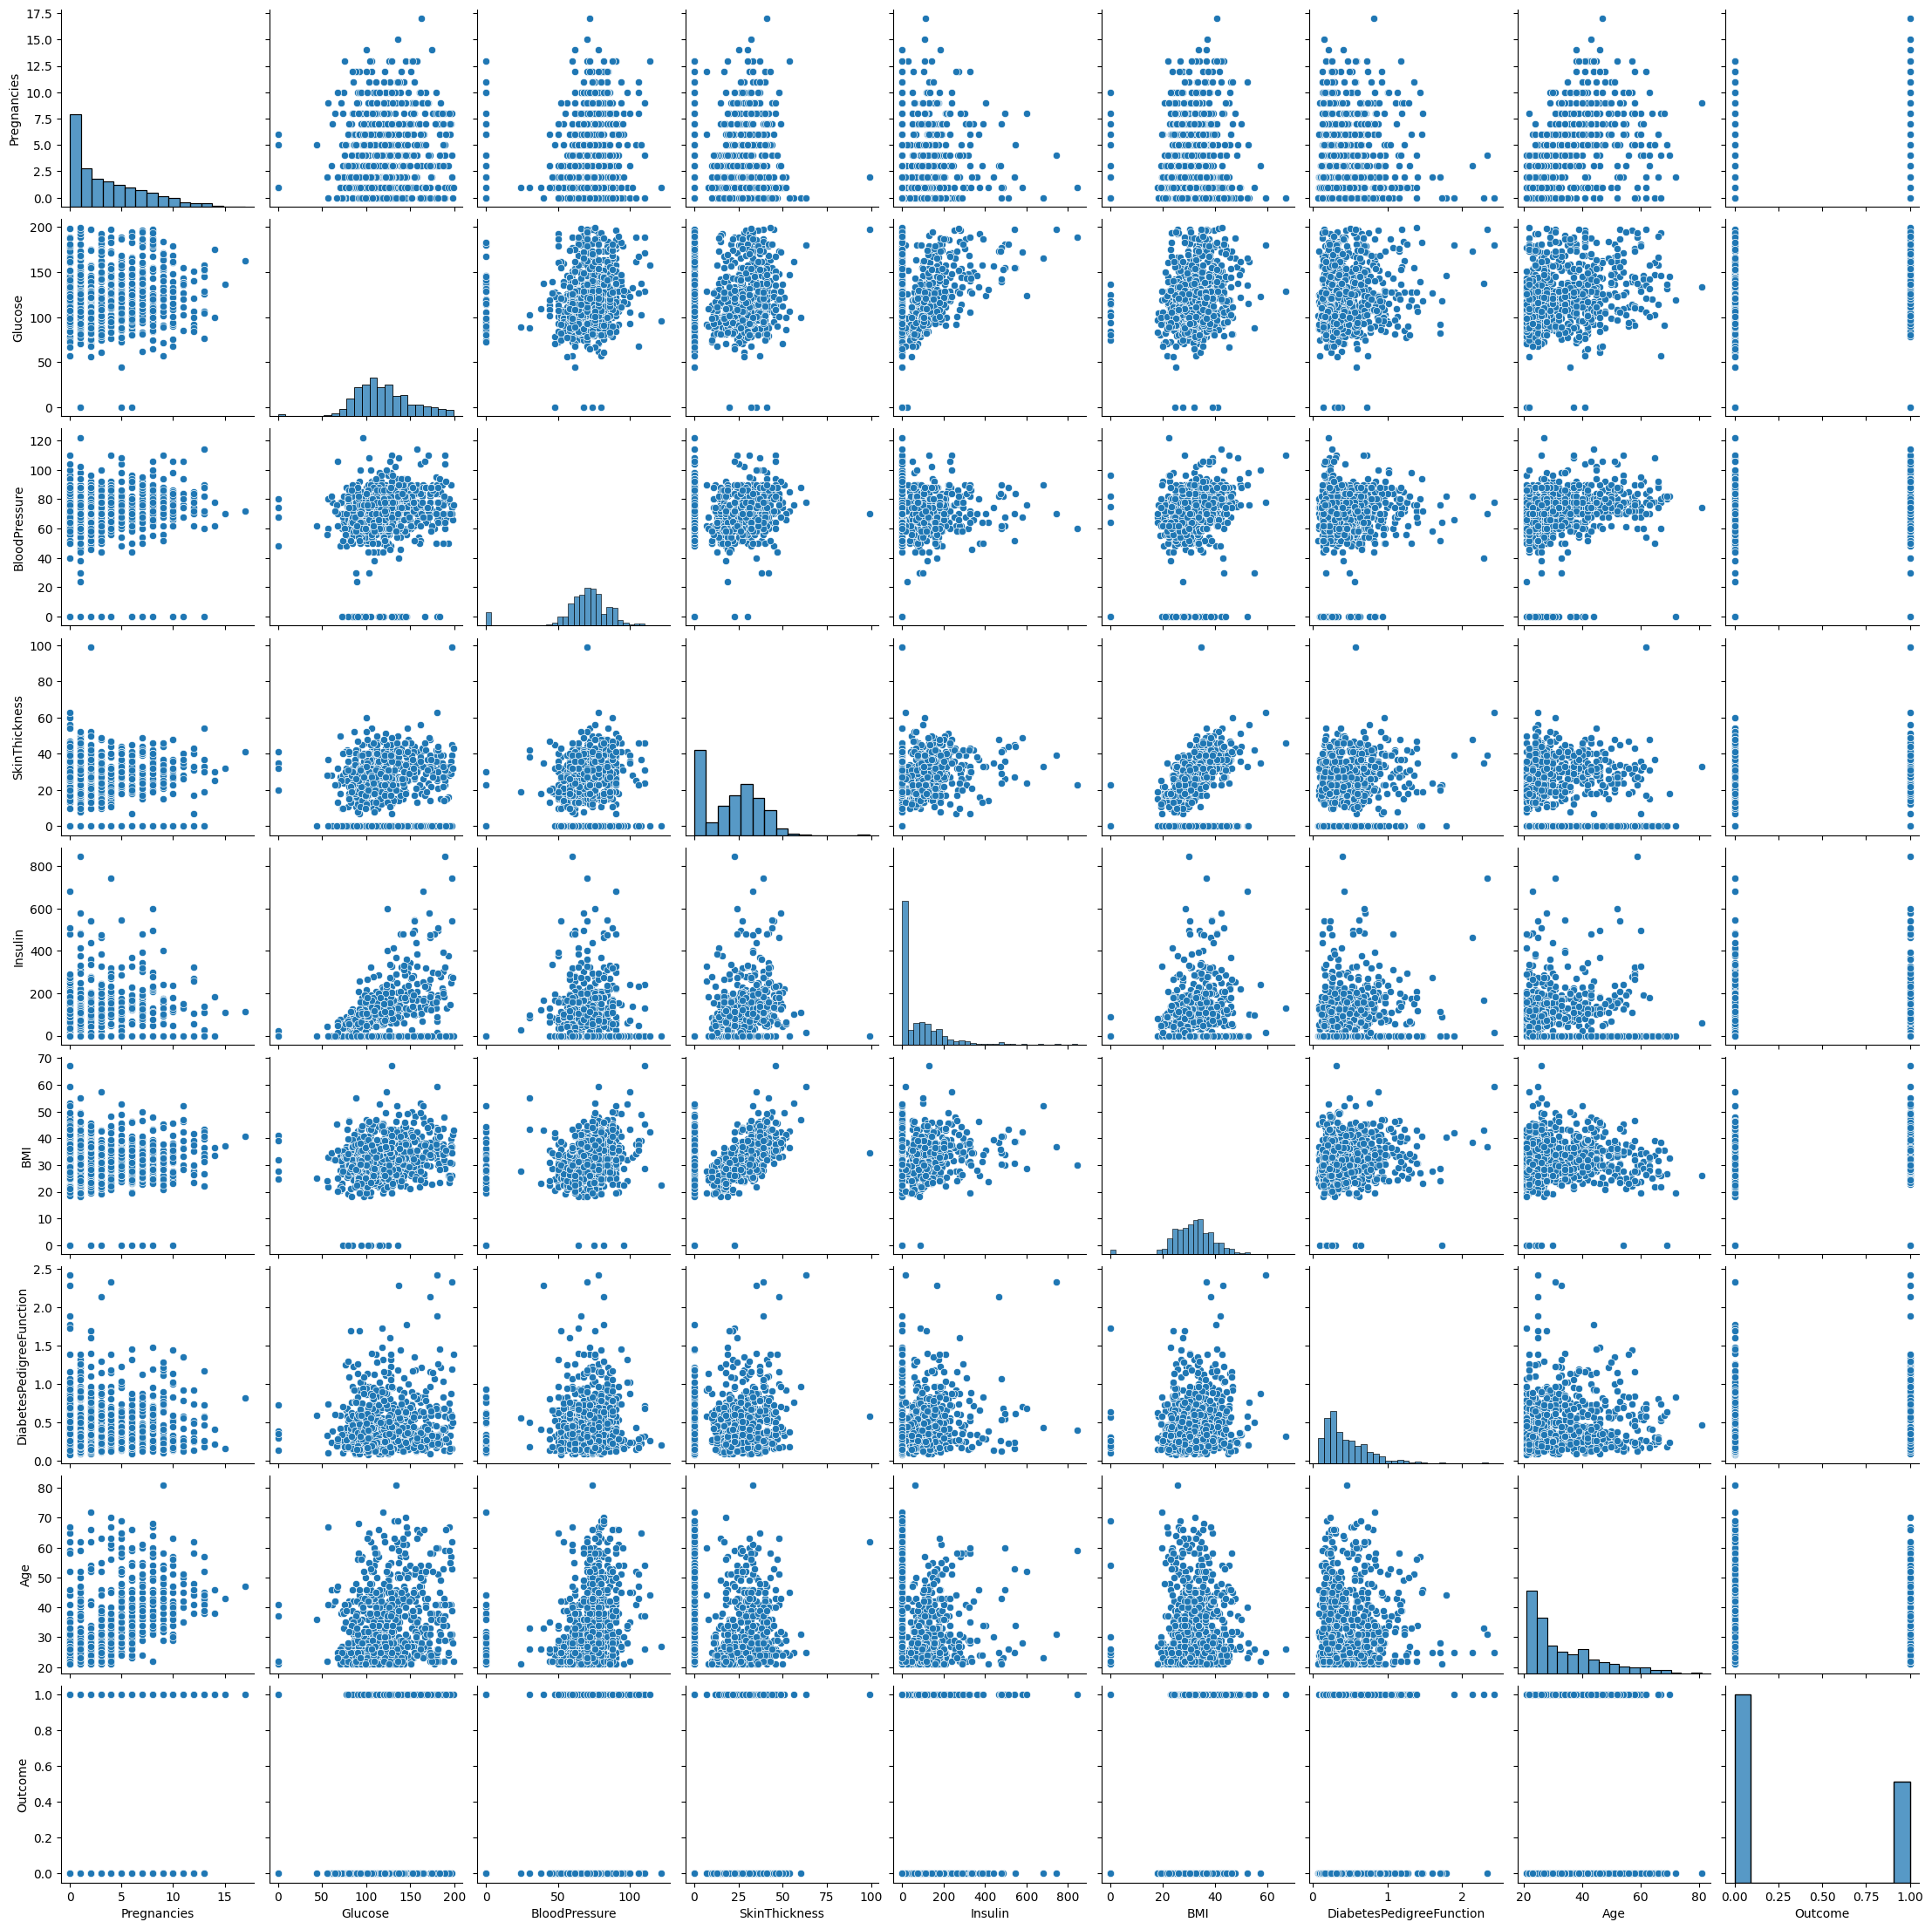

In [100]:
sns.pairplot(df)

### Replacing the 0 values in the features which cannot be zero

In [101]:
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].median())
df["BMI"] = df["BMI"].replace(0,df["BMI"].median())

<Axes: xlabel='count', ylabel='Outcome'>

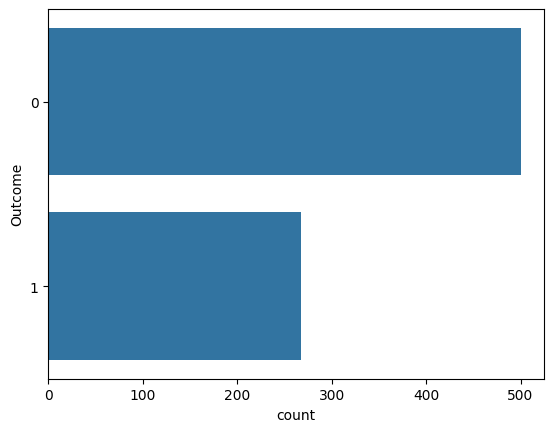

In [102]:
sns.countplot(df,y="Outcome")

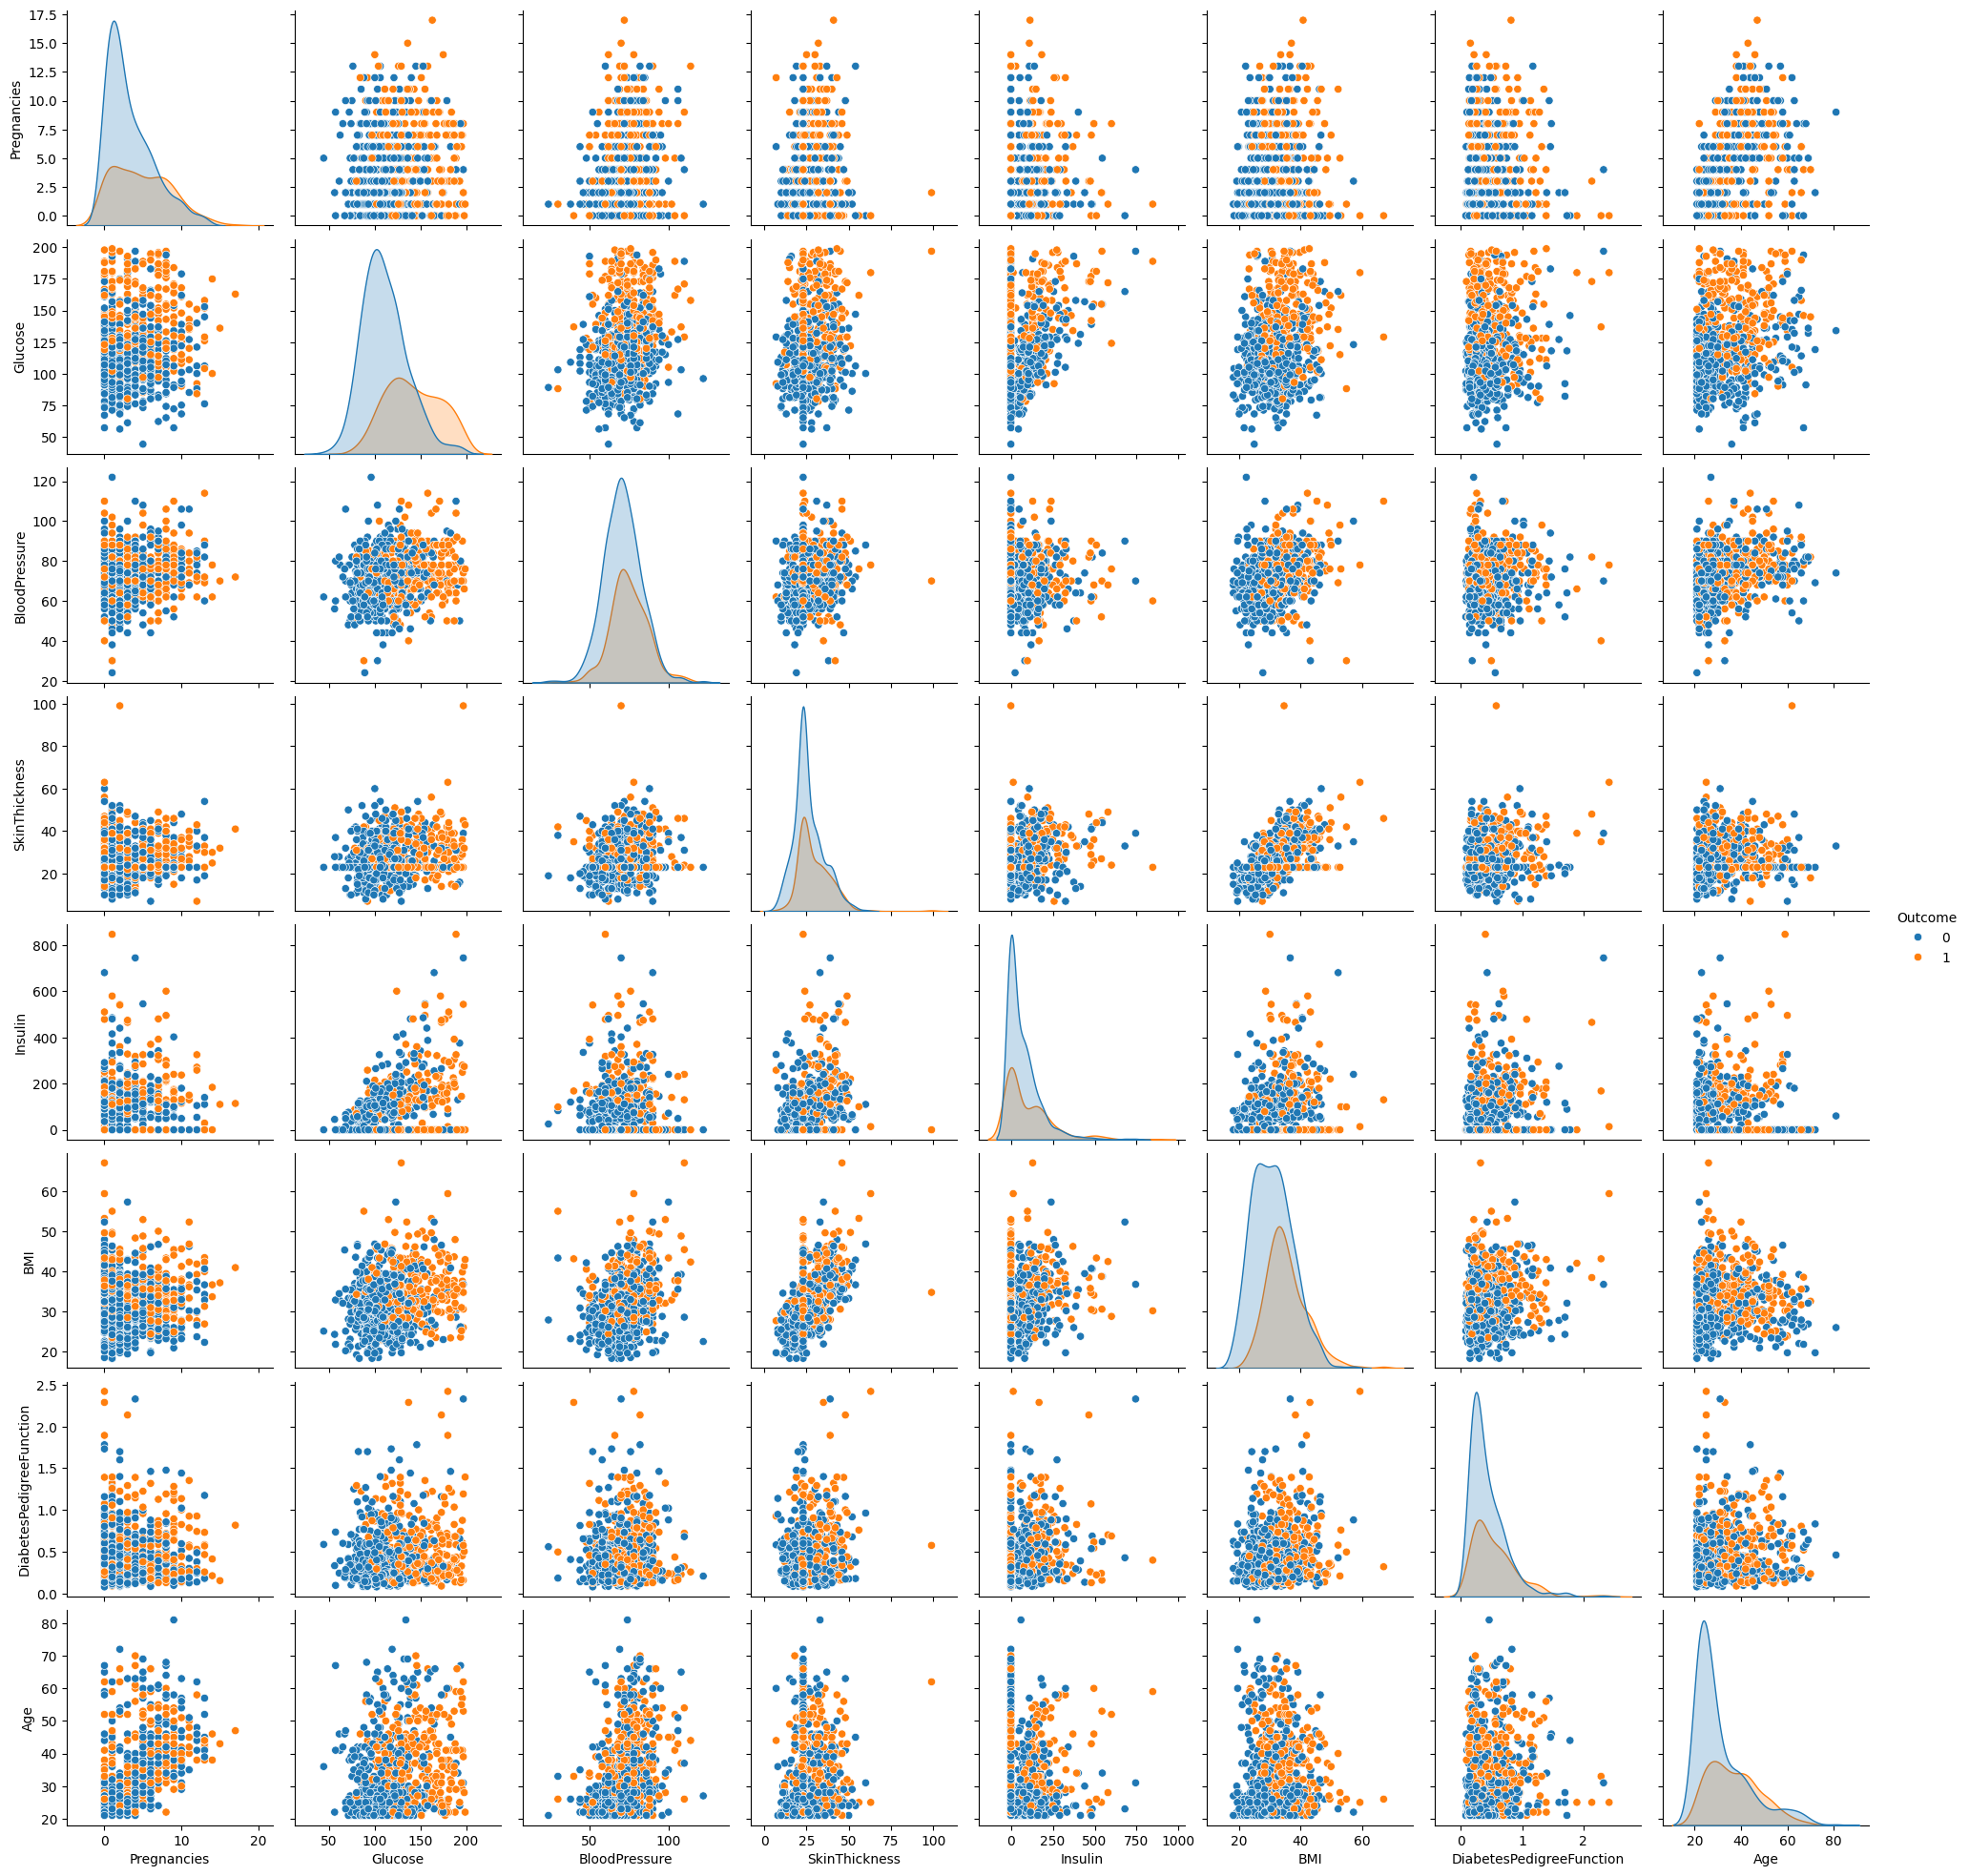

In [103]:
sns.pairplot(df,hue = "Outcome")

<Axes: >

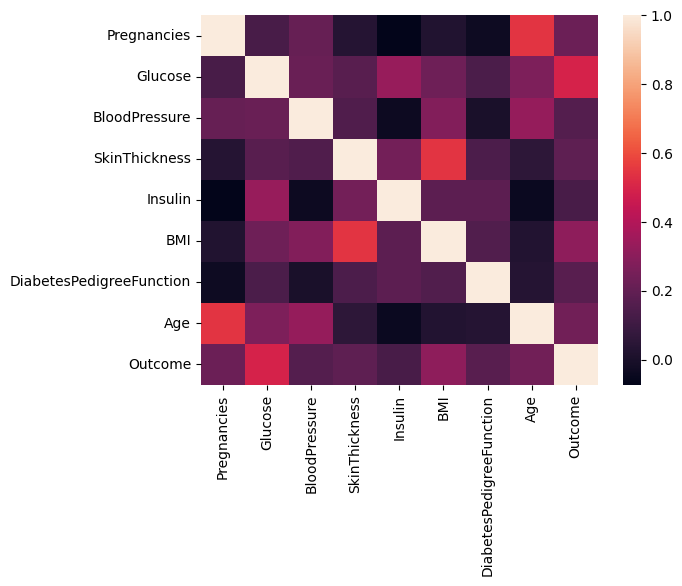

In [104]:
sns.heatmap(df.corr())

### Splitting dependent and independent features

In [105]:
X = df.drop("Outcome",axis = 1)
Y = df["Outcome"]

In [106]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,23,0,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63
764,2,122.0,70.0,27,0,36.8,0.340,27
765,5,121.0,72.0,23,112,26.2,0.245,30
766,1,126.0,60.0,23,0,30.1,0.349,47


### Splitting the data into test and train data

In [107]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 22)

In [108]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136.000000,70.0,32,110,37.1,0.153,43
602,1,124.000000,74.0,36,0,27.8,0.100,30
235,4,171.000000,72.0,23,0,43.6,0.479,26
565,2,95.000000,54.0,14,88,26.1,0.748,22
548,1,164.000000,82.0,43,67,32.8,0.341,50
...,...,...,...,...,...,...,...,...
491,2,89.000000,90.0,30,0,33.5,0.292,42
502,6,120.894531,68.0,41,0,39.0,0.727,41
358,12,88.000000,74.0,40,54,35.3,0.378,48
356,1,125.000000,50.0,40,167,33.3,0.962,28


### Applying Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression()
LR.fit(x_train,y_train)

c:\Users\tanma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
LR_pred = LR.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, LR_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7705627705627706


### Creating pickle file for deployment of the model

In [112]:
import pickle
pickle.dump(LR, open('model.pkl', 'wb'))